<a href="https://colab.research.google.com/github/kennylin8212/tibame1224-1/blob/main/1_6%E4%BD%9C%E6%A5%AD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
#Q1:假設我總共有一百層階梯,有兩種走路方式(一種是踏一層,第二種是踏兩層)
#請問我到達第一百層的時候, 總共有幾種不同方式?
#老師提示如下:

prev1, prev2 = 0, 0
total = 100
for i in range(total):
    # 主要要解決: prev1, prev2的設定


    pass
#print("走100階總共有", total, "種方式")
```
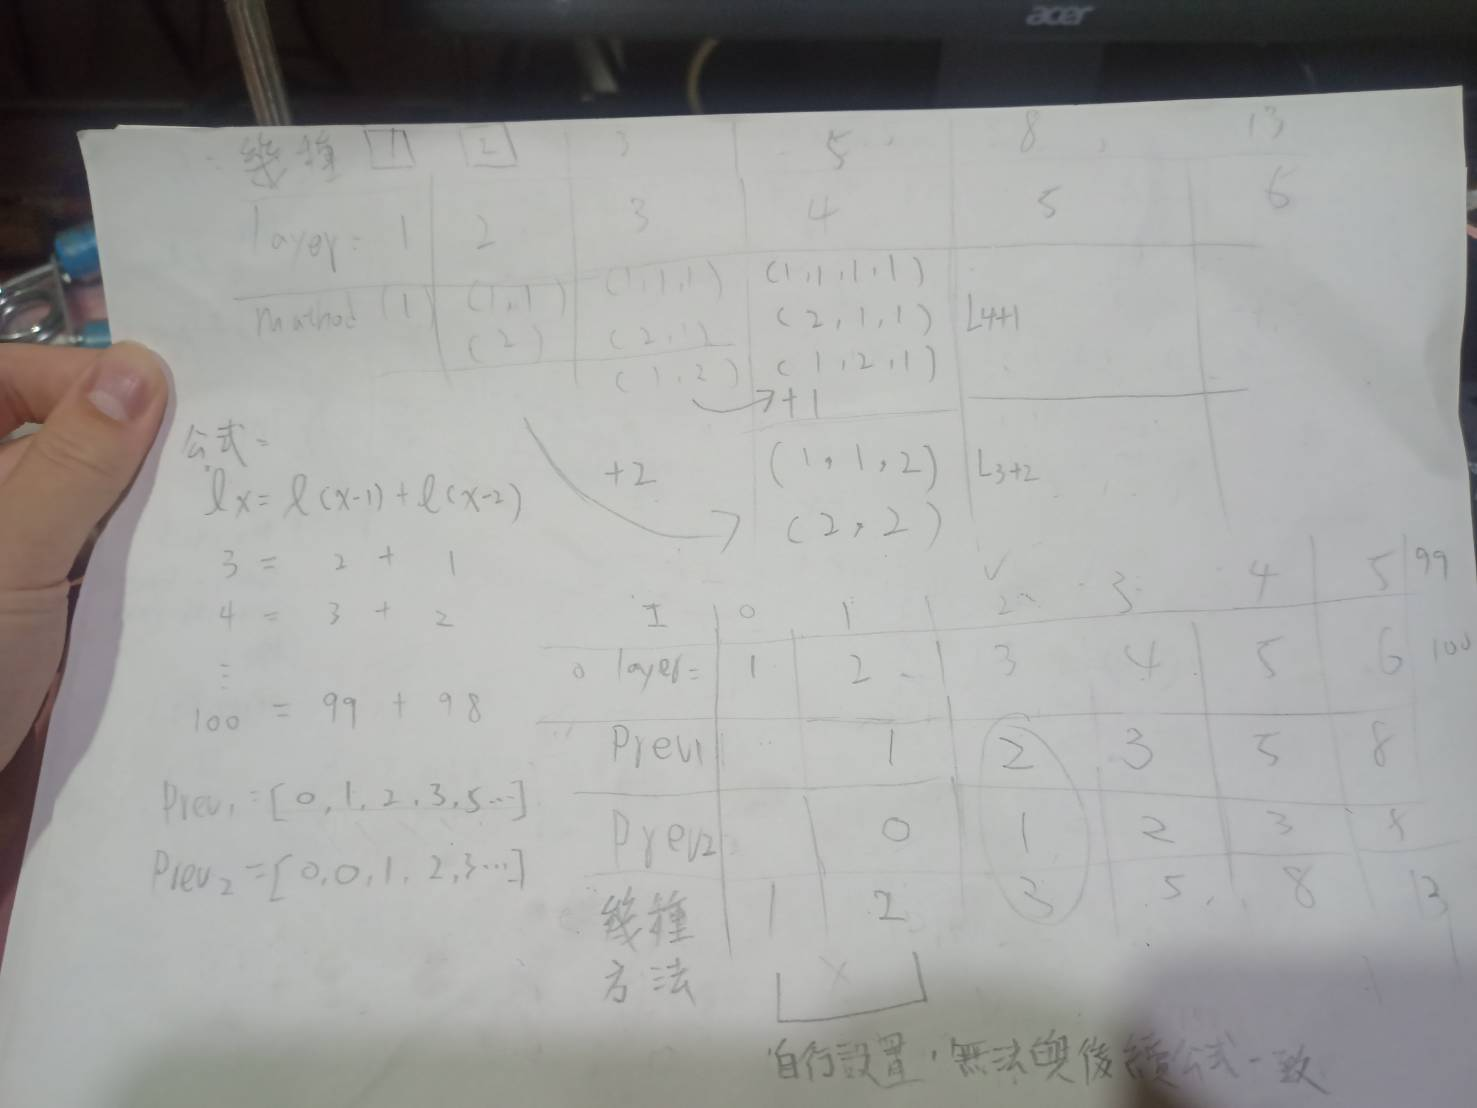

In [132]:
#錯誤示範
total = 3
prev1, prev2 = 0, 0
for i in range(total):
    if prev1 <= 3:
        layer = i + 1
        prev1 = layer -1
        prev1[i] = prev1 #prev1初始設定=1是整數型態 而整數並不支持像清單那樣的索引操作

TypeError: 'int' object does not support item assignment

In [14]:
#Q1解法1
total = 100
prev1 = [0] * total
prev2 = [0] * total


for i in range(total):
    layer = i + 1
    #第1階層不會有prev1與prev2
    #走layer階總共有 N 種方式
    if layer == 1:
        N = 1
        #print(layer)
        #print(prev1)
        #print(prev2)
    #第2階層不會有prev2
    elif layer <= 2:
        prev1[i] = layer - 1
        prev2[i] = prev1[i - 1]
        N = 2
        #print(layer)
        #print(prev1)
        #print(prev2)
    #直到第4階層才讓prev1與prev2的清單皆產生出1&2
    elif 3<= layer <= 4:
        prev1[i] = layer - 1
        prev2[i] = prev1[i - 1]
        N = prev1[i] + prev2[i]
        #print(layer)
        #print(prev1)
        #print(prev2)
    #第5階層開始兩清單都會是費波那契數列
    else:
        prev1[i] = prev1[i - 1] + prev1[i - 2]
        prev2[i] = prev1[i - 1]
        N = prev1[i] + prev2[i]
        #print(layer)
        #print(prev1)
        #print(prev2)
    #print("走",layer,"階層總共有",N,"種方式")
print("走",layer,"階層總共有",N,"種方式")

走 100 階層總共有 573147844013817084101 種方式


In [38]:
#Q1解法2(從第3層開始N會是費波那契數列)
total = 100
prev1 = [0] * total
prev2 = [0] * total
N = [0] * total

for i in range(total):
    layer = i + 1
    #第1階層不會有prev1與prev2
    #走layer階總共有 N 種方式
    if layer == 1:
        N[i] = layer
        #print(layer)
        #print(prev1)
        #print(prev2)
        #第2階層不會有prev2

    elif layer <= 2:
        prev1[i] = layer - 1
        prev2[i] = prev1[i - 1]
        N[i] = layer
        #print(layer)
        #print(prev1)
        #print(prev2)
    #直到第4階層才讓prev1與prev2的清單皆產生出1&2
    #從第3層開始N會是費波那契數列
    elif 3<= layer <= 4:
        prev1[i] = layer - 1
        prev2[i] = prev1[i - 1]
        N[i] = N[i - 1] +N[i - 2]
        #print(layer)
        #print(prev1)
        #print(prev2)
    #第5階層開始兩清單也都會是費波那契數列
    else:
        prev1[i] = prev1[i - 1] + prev1[i - 2]
        prev2[i] = prev1[i - 1]
        N[i] = N[i - 1] +N[i - 2]
        #print(layer)
        #print(prev1)
        #print(prev2)
    #print("走",layer,"階層總共有",N[layer-1],"種方式")

print("走",layer,"階層總共有",N[layer-1],"種方式")


走 100 階層總共有 573147844013817084101 種方式


In [123]:
#Q1解法3
def count_methods(layer):
    if layer <= 0:
        return 0
    elif layer == 1:
        return 1
    elif layer == 2:
        return 2
    else:
        #methods = [0] * layer 索引範圍是 0 到 layer - 1 會與最後的 return methods[layer]矛盾衝突
        methods = [0] * (layer + 1)
        methods[0] = 1
        methods[1] = 2

        for i in range(2,layer): #第3層的索引範圍range(2,3)只會取2
            methods[i] = methods[i - 1] + methods[i - 2] #methods[2] = methods[1] +methods[0] 從第3層開始N會是費波那契數列
        return methods[i]

N = count_methods(100)
print("走100階層總共有",N,"種方式")

走100階層總共有 573147844013817084101 種方式


In [129]:
#Gemini版本
# prompt: #Q1:假設我總共有一百層階梯,有兩種走路方式(一種是踏一層,第二種是踏兩層)
# #請問我到達第一百層的時候, 總共有幾種不同方式?

def count_ways(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        dp = [0] * (n + 1)
        dp[1] = 1
        dp[2] = 2
        for i in range(3, n + 1):
            dp[i] = dp[i - 1] + dp[i - 2]
        return dp[n]  ####對比上述做法?

ways = count_ways(100)
print("走100階總共有", ways, "種方式")

走100階總共有 573147844013817084101 種方式
